In [1]:
from time import time

from qiskit import transpile

from utilities import startup
from graphstate import GraphState, calc_negativities, calc_n_mean, plot_cxerr_corr
from entanglebase import EntangleBase

provider = startup()

Account enabled
Provider: ibm-q-melbourne


In [2]:
backend = provider.get_backend('ibm_perth')
test = GraphState(backend)
circ = test.circuit
circ.draw()

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │       
q_1: ┤ H ├─■──■──■─
     ├───┤    │  │ 
q_2: ┤ H ├────■──┼─
     ├───┤       │ 
q_3: ┤ H ├─■─────■─
     ├───┤ │       
q_4: ┤ H ├─┼──■────
     ├───┤ │  │    
q_5: ┤ H ├─■──■──■─
     ├───┤       │ 
q_6: ┤ H ├───────■─
     └───┘

In [10]:
backend = provider.get_backend('ibm_washington')
test = GraphState(backend)
print(test.nqubits, test.nedges)

127 142


In [27]:
from networkx import hexagonal_lattice_graph
import networkx as nx
import matplotlib.pyplot as plt

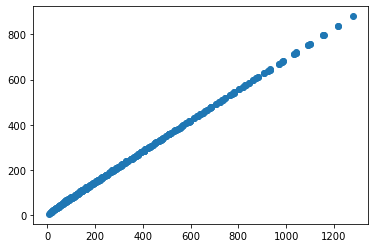

In [30]:
nedges = []
nnodes = []
for i in range(1, 21):
    for j in range(1, 21):
        G = nx.hexagonal_lattice_graph(i, j)

        nnodes.append(len(G.nodes))
        nedges.append(len(G.edges))
    
plt.scatter(nedges, nnodes)

In [23]:
G = hexagonal_lattice_graph(3, 3)
len(G.nodes)

30

In [4]:
circuits = test.gen_qst_circuits()

In [11]:
circuits['batch0']['XX'].draw()

┌───┐          ░ ┌───┐   ┌─┐   
 q_0: ┤ H ├─■────────░─┤ H ├───┤M├───
      ├───┤ │        ░ ├───┤   └╥┘┌─┐
 q_1: ┤ H ├─■──■──■──░─┤ H ├────╫─┤M├
      ├───┤    │  │  ░ └┬─┬┘    ║ └╥┘
 q_2: ┤ H ├────■──┼──░──┤M├─────╫──╫─
      ├───┤       │  ░  └╥┘ ┌─┐ ║  ║ 
 q_3: ┤ H ├─■─────■──░───╫──┤M├─╫──╫─
      ├───┤ │        ░   ║  └╥┘ ║  ║ 
 q_4: ┤ H ├─┼──■─────░───╫───╫──╫──╫─
      ├───┤ │  │     ░   ║   ║  ║  ║ 
 q_5: ┤ H ├─■──■──■──░───╫───╫──╫──╫─
      ├───┤       │  ░   ║   ║  ║  ║ 
 q_6: ┤ H ├───────■──░───╫───╫──╫──╫─
      └───┘          ░   ║   ║  ║  ║ 
c0: 4/═══════════════════╩═══╩══╩══╩═
                         2   3  0  1

In [3]:
tcirc = transpile(circ, backend, initial_layout=list(range(test.nqubits)), optimization_level=3)
tcirc.draw()

┌─────────┐┌────┐┌─────────┐                                      »
  q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────────────────────────────────»
           └─────────┘└────┘└─────────┘┌─┴─┐┌─────────┐   ┌────┐  ┌─────────┐»
  q_1 -> 1 ────────────────────────────┤ X ├┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├»
           ┌─────────┐┌────┐ ┌───────┐ └───┘└──┬────┬─┘┌──┴────┴─┐└─────────┘»
  q_2 -> 2 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───■─────┤ √X ├──┤ Rz(π/2) ├───────────»
           └─────────┘└────┘ └───────┘ ┌─┴─┐┌──┴────┴─┐└──┬────┬─┘┌─────────┐»
  q_3 -> 3 ────────────────────────────┤ X ├┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├»
           ┌─────────┐┌────┐ ┌───────┐ └───┘└──┬────┬─┘┌──┴────┴─┐└─────────┘»
  q_4 -> 4 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───■─────┤ √X ├──┤ Rz(π/2) ├───────────»
           ├─────────┤├────┤ ├───────┤   │     └────┘  └──┬────┬─┘┌─────────┐»
  q_5 -> 5 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───┼───────■────────┤ √X ├──┤ Rz(π/2) ├»
           ├─────────┤├────┤┌┴───────┴┐  │       │        └────┘  └─────────┘»
  q_6 -> 6 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──┼───────┼──────────■────────────────»
           └─────────┘└────┘└─────────┘┌─┴─┐     │        ┌─┴─┐   ┌─────────┐»
  q_7 -> 7 ────────────────────────────┤ X ├─────┼────────┤ X ├───┤ Rz(π/2) ├»
                                       └───┘   ┌─┴─┐   ┌──┴───┴──┐└──┬────┬─┘»
  q_8 -> 8 ────────────────────────────────────┤ X ├───┤ Rz(π/2) ├───┤ √X ├──»
                                               └───┘   └─────────┘   └────┘  »
  q_9 -> 9 ──────────────────────────────────────────────────────────────────»
           ┌─────────┐┌────┐ ┌───────┐         ┌────┐  ┌─────────┐           »
q_10 -> 10 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───■─────┤ √X ├──┤ Rz(π/2) ├───────────»
           ├─────────┤├────┤ ├───────┤   │     └────┘  └──┬────┬─┘┌─────────┐»
q_11 -> 11 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───┼───────■────────┤ √X ├──┤ Rz(π/2) ├»
           └─────────┘└────┘ └───────┘ ┌─┴─┐     │     ┌──┴────┴─┐└──┬────┬─┘»
q_12 -> 12 ────────────────────────────┤ X ├─────┼─────┤ Rz(π/2) ├───┤ √X ├──»
                                       └───┘     │     └─────────┘   └────┘  »
q_13 -> 13 ──────────────────────────────────────┼───────────────────────────»
                                               ┌─┴─┐   ┌─────────┐   ┌────┐  »
q_14 -> 14 ────────────────────────────────────┤ X ├───┤ Rz(π/2) ├───┤ √X ├──»
           ┌─────────┐┌────┐ ┌───────┐         ├───┴┐  ├─────────┤   └────┘  »
q_15 -> 15 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───■─────┤ √X ├──┤ Rz(π/2) ├───────────»
           ├─────────┤├────┤ ├───────┤   │     └────┘  └──┬────┬─┘┌─────────┐»
q_16 -> 16 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───┼───────■────────┤ √X ├──┤ Rz(π/2) ├»
           ├─────────┤├────┤┌┴───────┴┐  │       │        └────┘  └─────────┘»
q_17 -> 17 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──┼───────┼──────────■────────────────»
           └─────────┘└────┘└─────────┘┌─┴─┐     │        ┌─┴─┐   ┌─────────┐»
q_18 -> 18 ────────────────────────────┤ X ├─────┼────────┤ X ├───┤ Rz(π/2) ├»
                                       └───┘   ┌─┴─┐   ┌──┴───┴──┐└──┬────┬─┘»
q_19 -> 19 ────────────────────────────────────┤ X ├───┤ Rz(π/2) ├───┤ √X ├──»
                                               └───┘   └─────────┘   └────┘  »
q_20 -> 20 ──────────────────────────────────────────────────────────────────»
           ┌─────────┐┌────┐ ┌───────┐         ┌────┐  ┌─────────┐           »
q_21 -> 21 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───■─────┤ √X ├──┤ Rz(π/2) ├───────────»
           ├─────────┤├────┤ ├───────┤   │     └────┘  └──┬────┬─┘┌─────────┐»
q_22 -> 22 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├───┼───────■────────┤ √X ├──┤ Rz(π/2) ├»
           └─────────┘└────┘ └───────┘ ┌─┴─┐     │     ┌──┴────┴─┐└──┬────┬─┘»
q_23 -> 23 ────────────────────────────┤ X ├─────┼─────┤ Rz(π/2) ├───┤ √X ├──»
                                       └───┘     │     └─────────┘   └────┘  »
q_24 -> 24 ──────────────────────────────────────┼───────────────────────────»
                                               ┌─┴─┐   ┌─────

In [44]:
backend = provider.get_backend('ibmq_jakarta')
test = GraphState(backend)

time0 = time()
job = test.run_qst(reps=4, qrem=True, sim='device', execute_only=True)

time1 = time()
rho_dict_mit, rho_dict = test.qst_from_result(job.result(), output='all')

time2 = time()
negativities = calc_negativities(rho_dict, mode='max')
negativities_mit = calc_negativities(rho_dict_mit, mode='max')

time3 = time()
print("\033[4mNegativities\033[0m")
print(negativities)

print("")
print("\033[4mTime Stamps\033[0m")
print(f'Simulating Circuits: {time1 - time0}')
print(f"Reconstructing Density Matrices: {time2 - time1}")
print(f"Calculating Negativities: {time3 - time2}")

Negativities
[{(0, 1): 0.3385649796074559, (1, 2): 0.33915687037723097, (1, 3): 0.31020238551706336, (3, 5): 0.32846725351611483, (4, 5): 0.33074807228734643, (5, 6): 0.35625172465267996}, {(0, 1): 0.33600765457832205, (1, 2): 0.34597018146466446, (1, 3): 0.3073583483010127, (3, 5): 0.3312645688649345, (4, 5): 0.3356335327709539, (5, 6): 0.3579155502666593}, {(0, 1): 0.33835126832775464, (1, 2): 0.355865018303139, (1, 3): 0.3192276405176372, (3, 5): 0.32512204773436754, (4, 5): 0.3457341005492324, (5, 6): 0.3435104416312999}, {(0, 1): 0.34813946748769614, (1, 2): 0.35029620215054513, (1, 3): 0.3229985709163396, (3, 5): 0.3116410636374436, (4, 5): 0.3367573620550221, (5, 6): 0.3588447812332649}]

Time Stamps
Simulating Circuits: 4.361403703689575
Reconstructing Density Matrices: 11.028360366821289
Calculating Negativities: 0.0


In [7]:
backend = provider.get_backend('ibmq_toronto')
job = backend.retrieve_job('62e007f6a4cdd20758511302')
#backend = provider.get_backend('ibmq_jakarta')
#job = backend.retrieve_job('62e0bea3c2d497582ee36c59')
test = GraphState(backend)

time0 = time()
result = job.result()

time1 = time()
rho_dict_mit, rho_dict = test.qst_from_result(result, output='all')

In [8]:
time2 = time()
mode = 'max'
negativities_mit = calc_negativities(rho_dict_mit, mode=mode)
negativities = calc_negativities(rho_dict, mode=mode)

time3 = time()
print("\033[4mNegativities\033[0m")
print(negativities[0])

print("")
print("\033[4mTime Stamps\033[0m")
print(f'Fetching Results: {time1 - time0}')
print(f"Reconstructing Density Matrices: {time2 - time1}")
print(f"Calculating Negativities: {time3 - time2}")

Negativities
{(0, 1): 0.34825913458946295, (1, 2): 0.24648133382494897, (1, 4): 0.2282879011629979, (2, 3): 0.0805130510987527, (3, 5): 0.1576271771533457, (4, 7): 0.19822335720984535, (5, 8): 0.3236912991367185, (6, 7): 0.2077293383059582, (7, 10): 0.1494273139775926, (8, 9): 0.3941071555991511, (8, 11): 0.32314110516290107, (10, 12): 0.0, (11, 14): 0.17904094808409984, (12, 13): 0.013930784594438066, (12, 15): 0.011887729356363012, (13, 14): 0.06955024341136255, (14, 16): 0.16904180098143998, (15, 18): 0.07087263950091639, (16, 19): 0.2723836533168989, (17, 18): 0.2125467960790905, (18, 21): 0.19819534422188978, (19, 20): 0.3352746266716467, (19, 22): 0.3337870772458285, (21, 23): 0.2680331933268058, (22, 25): 0.36106660434668464, (23, 24): 0.27734618608552775, (24, 25): 0.3805776914110093, (25, 26): 0.3669874940138247}

Time Stamps
Fetching Results: 498.42655849456787
Reconstructing Density Matrices: 31.08736538887024
Calculating Negativities: 0.07719039916992188


In [9]:
n_mean, _ = calc_n_mean(negativities)
n_mean_mit, _ = calc_n_mean(negativities_mit)

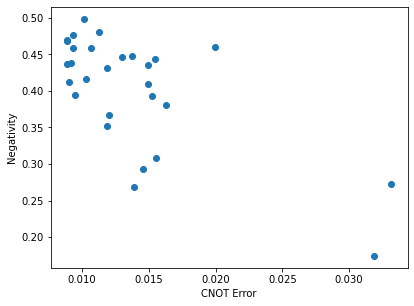

In [10]:
properties = job.properties()
adj_edges = test.adj_edges
fig = plot_cxerr_corr(properties, adj_edges, n_mean_mit, inc_adj=True)